In [10]:
!python simSumoCmd.py

/bin/sh: 1: python: not found


In [ ]:
a= np.array([[1,2],[3,4],[100,99],[5,9]])
a[np.where(a[:,0]<6)]
a[:,0]<6

对输入的样本进行蒙特卡洛模拟分析，原始对应程序为mainSimSumoFranceDatra
vehObj: [125.62  13.75]
vehsOthers1 [[0.99 0.0]
 [6.49 0.0]
 [11.99 0.0]
 [17.49 0.0]
 [23.0 0.01]
 [86.67 12.26]]
vehsOthers_all [[0.99 0.0]
 [6.49 0.0]
 [11.99 0.0]
 [17.49 0.0]
 [23.0 0.01]
 [86.67 12.26]
 [125.62 13.75]]
步数:0,车辆数:0
步数:1,车辆数:7
步数:2,车辆数:7
步数:3,车辆数:7
步数:4,车辆数:7
步数:5,车辆数:7
步数:6,车辆数:7
步数:7,车辆数:7
步数:8,车辆数:7
步数:9,车辆数:7
步数:10,车辆数:7
步数:11,车辆数:7
步数:12,车辆数:7
步数:13,车辆数:7
步数:14,车辆数:7
步数:15,车辆数:7
步数:16,车辆数:7
步数:17,车辆数:7
步数:18,车辆数:7
步数:19,车辆数:7
步数:20,车辆数:7
步数:21,车辆数:7
步数:22,车辆数:7
步数:23,车辆数:7
步数:24,车辆数:7
步数:25,车辆数:7
步数:26,车辆数:7
步数:27,车辆数:7
步数:28,车辆数:7
步数:29,车辆数:7
步数:30,车辆数:7
步数:31,车辆数:7
步数:32,车辆数:7
步数:33,车辆数:7
步数:34,车辆数:7
步数:35,车辆数:7
步数:36,车辆数:7
步数:37,车辆数:7
步数:38,车辆数:7
步数:39,车辆数:7
步数:40,车辆数:7
步数:41,车辆数:7
步数:42,车辆数:7
步数:43,车辆数:7
步数:44,车辆数:7
步数:45,车辆数:7
步数:46,车辆数:7
步数:47,车辆数:7
步数:48,车辆数:7
步数:49,车辆数:7
步数:50,车辆数:7
步数:51,车辆数:7
步数:52,车辆数:7
步数:53,车辆数:7
步数:54,车辆数:7
步数:55,车辆数:7
步数:56,车辆数:7
步数:57,车辆数:7
步数:58,车辆数:7
步数:59,车辆数:7
步数:60,车辆数:7
步数:61,


simNum:0
running time(ms):38200,tls state: G,duration:20.000,speed:4.88,lanePos:199.77563845379666,dist2TLS:0.22,edgeID is e1to2, TLS is (('2', 0, 0.22436154620334037, 'G'),),
leaderInfo ID:d6,vehPos:7.12,speed:4.88,vehLanePos:7.1224982360924525,laneID:e2to3_0,edgeID:e2to3,
minSpeed 0.0
minSpeedList ,min:0.00,max:0.00,mean:0.00
origin speedFlag 3,speedSlot [25/3.6,35/3.6]




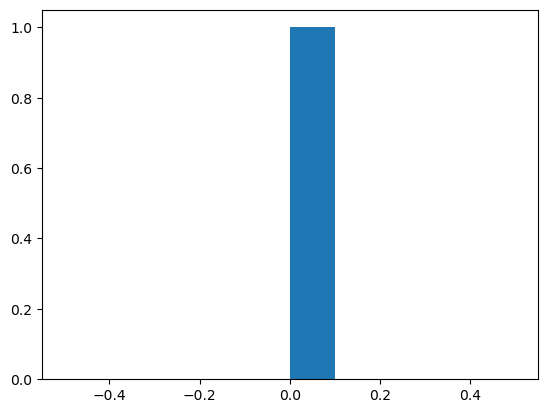

In [1]:

print("对输入的样本进行蒙特卡洛模拟分析，原始对应程序为mainSimSumoFranceData")

#用于简单过路灯模拟
#1.单直车道. 2.无车道转换。3.所有车假设为同一类车，也就是汽车动力学和汽车运动学一样
#作者lukeliuli@163.com
# -*- coding: utf-8 -*-
#https://sumo.dlr.de/pydoc/traci.html
"""
@author: lukeliuli@163.com
"""

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import sys
import random

#import traci as libsumo
import libsumo
import matplotlib.pyplot as plt  


import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd
import numpy as np
import os
import time
########################################################################################################################

def simSumoCmd(params):
    #print(params)
    simNum =  params["simNum"] #= 150
    redLightTime =  params["redLightTime"]# = 15
    otherVehs =   params["otherVehs"] #= [[1, 0],[7,0],[14,0]]  # [距离交通灯的距离1，行驶速度1,距离交通灯的距离2，行驶速度2]
    otherVehsParams =   params["otherVehsParams"] #= [5.5, 2, -9, 60 /3.6, 0.2]  # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距]
    objectVeh =  params["objectVeh"] #= [50, 0] 距离交通灯的距离,当前速度
    objectVehParams =  params["objectVehParams"] #= [5.5, 2, -9, 60 /3.6, 0.2]  # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距]
    
    nextTLSID = "2"
    trafficLightPos =200
    objvehID  = 'o1'
    routeID = 'platoon_route'
    typeID1 = 'EBUS'
    typeID2 = 'EBUS2'
    otherVehID = 'd'


    #####基本运行配置
    if 'SUMO_HOME' in os.environ:
        tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
        sys.path.append(tools)
    else:
        sys.exit("please declare environment variable 'SUMO_HOME'")
    
    path = os.getcwd()
    #path2 = path+"\sumoCfgs\my1Lane1Tls-server.sumocfg"#window
    path2 = path+"/sumoCfgs1/my1Lane1Tls-server.sumocfg"#linux
    sumoBinary = "sumo"
    
    libsumo.close()
    #libsumo.start(["sumo-gui", "-c", path2])
    libsumo.start([sumoBinary, "-c", path2,'--ignore-route-errors'])
    
    #####基本车辆参数设定
    
    
    
    
    
      
                            
                          
     # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,不专心,速度噪声]                               
    length,maxAcc,maxDacc,maxSpeed,tau,minGap,imperfection,speedFactor = objectVehParams
    
    libsumo.vehicletype.setAccel(typeID1,maxAcc)  
    libsumo.vehicletype.setDecel(typeID1,maxDacc) 
    libsumo.vehicletype.setImperfection(typeID1,imperfection)
    libsumo.vehicletype.setLength(typeID1,length) 
    libsumo.vehicletype.setMaxSpeed(typeID1,maxSpeed)   
    libsumo.vehicletype.setMinGap(typeID1,minGap) 
    libsumo.vehicletype.setSpeedFactor(typeID1,speedFactor)  
    libsumo.vehicletype.setTau(typeID1,tau)  
  
                          
                            
    # [车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,速度噪声]                         
    length,maxAcc,maxDacc,maxSpeed,tau,minGap,imperfection,speedFactor = otherVehsParams
    libsumo.vehicletype.setAccel(typeID2,maxAcc)  
    libsumo.vehicletype.setDecel(typeID2,maxDacc) 
    libsumo.vehicletype.setImperfection(typeID2,imperfection)
    libsumo.vehicletype.setLength(typeID2,length) 
    libsumo.vehicletype.setMaxSpeed(typeID2,maxSpeed)   
    libsumo.vehicletype.setMinGap(typeID2,minGap) 
    libsumo.vehicletype.setSpeedFactor(typeID2,speedFactor) 
    libsumo.vehicletype.setTau(typeID2,tau) 
                 
                            


                                 

    #greenTime = max(random.random()*greenTime,0.1)
    #交通灯设定为红灯逻辑
    allProgramLogics = libsumo.trafficlight.getAllProgramLogics(nextTLSID)
    lgc1 = allProgramLogics[0]
    yellowDurTime = lgc1.phases[0].duration
    greenDurTime = lgc1.phases[1].duration
    yellowDurTime = lgc1.phases[2].duration
    redDurTime = lgc1.phases[3].duration
    
    lgc1.phases[0].state = 'y'
    lgc1.phases[0].duration =yellowDurTime
    lgc1.phases[1].state = 'r'
    lgc1.phases[1].duration =redLightTime#修改绿灯时间
    
    lgc1.phases[2].state = 'y'
    lgc1.phases[2].duration =yellowDurTime
    
    lgc1.phases[3].state = 'G'
    lgc1.phases[3].duration =greenDurTime
    
    libsumo.trafficlight.setProgramLogic(nextTLSID,lgc1) 
    phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
    
    """
    ####修改逻辑和红灯时间，随机参数
    redTime =  params["redTime"]#注意坐标的原点
    redTime = max(random.random()*redTime,0.1)
    allProgramLogics = libsumo.trafficlight.getAllProgramLogics(nextTLSID)
    lgc1 = allProgramLogics[0]
    yellowDurTime = lgc1.phases[0].duration

    lgc1.phases[1].state = 'r'
    redDurTime = lgc1.phases[1].duration

    yellowDurTime = lgc1.phases[2].duration

    lgc1.phases[3].state = 'G'
    greenDurTime = lgc1.phases[3].duration

    lgc1.phases[1].duration = redTime
    libsumo.trafficlight.setProgramLogic(nextTLSID,lgc1) 
    phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
    
    
    veh = "00003"
    tlsList = libsumo.vehicle.getNextTLS(veh)
    tlsID_T, tlsIndex, dist, state = tlsList[0] 
    """
    requireStop =0 
    stepNum = 0
    libsumo.simulationStep()
    statRec1 = []
    minSpeed = 100000
    ##############################################################
    while requireStop == 0:
        print("步数:%d,车辆数:%d" %(stepNum,libsumo.simulation.getMinExpectedNumber()))
        if (stepNum == 0):
            dist,vel = objectVeh
            vel  = min(60/3.6,vel)
            libsumo.vehicle.add(objvehID, routeID, typeID=typeID1, depart='0', departLane='first', \
                        departPos=trafficLightPos-dist, departSpeed=str(vel))
            counter = 0
            for v in otherVehs:
                counter = counter+1
                dist,vel = v
                vel  = min(60/3.6,vel)
                #https://sumo.dlr.de/docs/Specification/index.html
                #https://sumo.dlr.de/docs/Networks/SUMO_Road_Networks.html
                libsumo.vehicle.add(otherVehID+str(counter), routeID, typeID=typeID2, depart='0', departLane='first', \
                                    departPos=str(trafficLightPos-dist), departSpeed=str(vel))
        
        libsumo.simulationStep()
        stepNum += 1

        ####https://sumo.dlr.de/daily/pydoc/traci._vehicle.html
        states = libsumo.trafficlight.getRedYellowGreenState(nextTLSID)
        timeT = libsumo.simulation.getCurrentTime()  # 当前时间
        nextSwitch = libsumo.trafficlight.getNextSwitch(nextTLSID)
        phaseName = libsumo.trafficlight.getPhaseName(nextTLSID)
        phase = libsumo.trafficlight.getPhase(nextTLSID)
        phaseDur = libsumo.trafficlight.getPhaseDuration(nextTLSID)
        curTime = timeT/1000
        phaseLeftTime = nextSwitch - curTime

        nextTLSNow= libsumo.vehicle.getNextTLS(objvehID)

        vehPos = libsumo.vehicle.getPosition(objvehID)[0]
        speed = libsumo.vehicle.getSpeed(objvehID)
        vehMaxSpeed = libsumo.vehicle.getMaxSpeed(objvehID)
        vehLanePos = libsumo.vehicle.getLanePosition(objvehID)

        laneID = libsumo.vehicle.getLaneID(objvehID)
        edgeID = libsumo.vehicle.getRoadID(objvehID)
        meanSpeed = libsumo.lane.getLastStepMeanSpeed(laneID)
        laneMaxSpeed = libsumo.lane.getMaxSpeed(laneID)

        vehMaxSpeed = min(vehMaxSpeed, laneMaxSpeed)

        dist2TLS = trafficLightPos-vehLanePos
        arrivalTime1 = min(100,dist / (speed + 0.001))
        arrivalTime2 = min(100,dist / vehMaxSpeed)


        passTLS = nextTLSNow==nextTLSID

        leaderID = libsumo.vehicle.getLeader(objvehID)
        if leaderID:
            leaderInfo = getVehicleInfo(leaderID[0])
        else:
            leaderInfo = None
        
        
        #if timeT> 40000:#毫秒ms
        #    print("simStop:timeT/1000 > 40")
        #    requireStop = 1
            
        if dist2TLS<=0.3: 
            print("simStop:dist2TLS<=0.3")
            requireStop = 1
            
            
        edgeIDNow =  libsumo.vehicle.getRoadID(objvehID)
        if edgeIDNow != "e1to2" or passTLS:  # if time is over 30 second stoping the simulation
            print("simStop:next tls,edge is %s,%s"% (nextTLSNow,libsumo.vehicle.getRoadID(objvehID)))
            requireStop = 1
            
            
      

        
        tmp = "running time(ms):%d,tls state: %s,duration:%.3f," % (timeT,states,phaseDur)
        strRec1 = tmp
        tmp = "speed:%.2f,lanePos:%s,dist2TLS:%.2f," % (speed,vehLanePos,dist2TLS)
        strRec1 = strRec1+tmp
        tmp = "edgeID is %s, TLS is %s," % (edgeIDNow,nextTLSNow)
        strRec1 = strRec1+tmp
        
        statRec1.append([states,phaseDur,timeT,passTLS,speed,vehLanePos,dist2TLS])
        
        if timeT>1000:#降低误差
            minSpeed = min(speed,minSpeed)
        
        if params["log"]:
            print(strRec1)  
            print("leadID：%s,leadInfo:%s" %(leaderID[0],leaderInfo))

    
    libsumo.close()
                  
    return statRec1,strRec1,minSpeed,leaderInfo 
########################################################################################################################

def getVehicleInfo(objvehID):
    info ="No Veh"
    if len(objvehID) == 0:
        return info
     
    if objvehID:
        vehPos = libsumo.vehicle.getPosition(objvehID)[0]
        speed = libsumo.vehicle.getSpeed(objvehID)
        vehMaxSpeed = libsumo.vehicle.getMaxSpeed(objvehID)
        vehLanePos = libsumo.vehicle.getLanePosition(objvehID)
        laneID = libsumo.vehicle.getLaneID(objvehID)
        edgeID = libsumo.vehicle.getRoadID(objvehID)

        info = "ID:%s,vehPos:%.2f,speed:%.2f,vehLanePos:%s,laneID:%s,edgeID:%s," %(objvehID,vehPos,speed,vehLanePos,laneID,edgeID)

        TLSNow = libsumo.vehicle.getNextTLS(objvehID)
        if len(TLSNow)>0:
            name= TLSNow[0][0]
            phase= TLSNow[0][1]
            dist= TLSNow[0][3]
            tmp = "TLSName:%s,TLSPhase:%s,TLSDist:%s" %(name,phase,dist)
            info = info+tmp


    return info

########################################################################################################################
###测试程序1
def test1():
    ####获得一个样本进行测试
    df1 = pd.read_csv('./trainData/france_0_allSamples1.csv')
    #df1.head(5)
    df2 = df1.loc[df1['redLightTime']>10]
    df2 = df2.loc[df1['speedFlag'] ==3]
    df2 = df2.loc[df1['vehPos_3'] >0]



    randIndex = random.randint(0,len(df2))
    tmp = df2.iloc[randIndex].values


    vehID,redLightTime,distToRedLight,speed,laneAvgSpeed,arriveTime1,arriveTime2,numStillVeh,ArrivalDivRedTime,\
        vehPos_1,vehSpeed_1,vehPos_2,vehSpeed_2,vehPos_3,vehSpeed_3,vehPos_4,vehSpeed_4,vehPos_5,vehSpeed_5,\
        vehPos_6,vehSpeed_6,vehPos_7,vehSpeed_7,vehPos_8,vehSpeed_8,vehPos_9,vehSpeed_9,vehPos_10,vehSpeed_10,\
        vehPos_11,vehSpeed_11,vehPos_12,vehSpeed_12,vehPos_13,vehSpeed_13,vehPos_14,vehSpeed_14,vehPos_15,vehSpeed_15,\
        vehPos_16,vehSpeed_16,vehPos_17,vehSpeed_17,vehPos_18,vehSpeed_18,vehPos_19,vehSpeed_19,vehPos_20,vehSpeed_20,\
        speedFlag = tmp
    vehObj = np.array([distToRedLight,speed])
    vehsOthers = tmp[9:-1]
    vehsOthers = vehsOthers.reshape(-1,2)
    vehsOthers_all = vehsOthers[np.where(vehsOthers[:,0]>0)]
    vehsOthers1 = vehsOthers_all[0:-1]
    print("vehObj:",vehObj)
    print("vehsOthers1",vehsOthers1)
    print("vehsOthers_all",vehsOthers_all)
    
    #print(vehsOthers)
    #redLightTime = redLightTime



    time.sleep(5);
    #####################################################################
    params =dict()
    params["simNum"] = 1
    params["redLightTime"] = redLightTime
    params["otherVehs"] = vehsOthers1  # [[距离交通灯的距离1，行驶速度1],[距离交通灯的距离2，行驶速度2]]

    #[车辆长度，最大加速度,最大减加速度，最大速度，反应时间,最小间距,不专心,速度噪声]                              
    params["otherVehsParams"] = [5,2,9,60/3.6,     0.5, 0.5 ,0.01,0.05] 

    params["objectVeh"] = vehObj
    #[车辆长度，最大加速度,最大减加速度，最大速度，反应时间(0.01到0.1的传输延迟，0.2到0.5的执行延迟),最小间距,不专心,速度噪声]  
    params["objectVehParams"] = [5,2,9,60/3.6,                       0.5,                           0.5,      0.01,  0.05] 
    params["log"] = False
    minSpeedList = []
    
    for i in range(params["simNum"]):

         #加入噪声
         params["otherVehsParams"] = [5,2+random.uniform(0,1),9,60/3.6,0.3+random.uniform(0,0.1), 0.5 ,0.01,0.05] 
         params["objectVehParams"] = [5,2+random.uniform(0,1),9,60/3.6,0.3+random.uniform(0,0.1), 0.5, 0.01,0.05] 
         statRec1,strRec1,minSpeed,leaderInfo = simSumoCmd(params)


         print("\nsimNum:%d" %i)
         print(strRec1)
         print("leaderInfo",leaderInfo )
         print('minSpeed',minSpeed)
         minSpeedList.append(minSpeed)

    minSpeedList1 = np.array(minSpeedList)
    print("minSpeedList ,min:%.2f,max:%.2f,mean:%.2f" %(np.min(minSpeedList1),np.max(minSpeedList1),np.mean(minSpeedList1)))
    speedSlot = ["[0,5/3.6]","[5/3.6,15/3.6]","[15/3.6,25/3.6]","[25/3.6,35/3.6]","[35/3.6,80/3.6]"]
    print("origin speedFlag %d,speedSlot %s\n\n" %(speedFlag,speedSlot[speedFlag]))
    plt.hist(minSpeedList)
  
########################################################################################################################
#主程序


test1()




In [ ]:
!conda install numba -y

^X Exit^R Read File ^\ Replace   ^U Paste     ^J Justify   ^/ Go To Line              tmp.py                                   